---
### Universidad de Costa Rica
#### IE0405 - Modelos Probabilísticos de Señales y Sistemas
---

# `Py6` - *Módulo de estadística para cálculo de momentos*

> Todos los modelos probabilísticos tienen "momentos", que son descriptores estadísticos de su forma y tendencias. Entre ellos (infinitos) son más relevantes: la media, la varianza, la inclinación y la kurtosis. Se pueden conocer de forma analítica con los parámetros de cada modelo, pero también numéricamente a partir de una muestra de datos.

---

## Ajuste de modelos

El ajuste de modelos tiene el objetivo de encontrar un modelo que describa adecuadamente un conjunto de datos. Esta descripción nunca será perfecta, ya que cualquier modelo será en cierto grado una simplificación, y siempre habrá factores que no logra tomar en cuenta. 

Los modelos generalmente se obtienen mediante un análisis de regresión en el que, dada una variable dependiente que es función de una serie de variables independientes, se toma una ecuación de dependencia dada por una serie de parámetros libres, y se encuentran los valores de dichos parámetros que minimizan el error.

### Estimación de máxima verosimilitud (MLE)

La [estimación de máxima verosimilitud](https://towardsdatascience.com/maximum-likelihood-estimation-how-it-works-and-implementing-in-python-b0eb2efb360f) (**MLE**, *maximum likelihood estimation*) es un método para realizar ajuste de modelos asociados a distribuciones probabilísticas de variables aleatorias. En esencia, funciona de manera análoga a una regresión. Consiste en encontrar los parámetros de una función de distribución probabilística que maximicen la probabilidad de ocurrencia, de acuerdo a esta distribución, de los datos que se están tomando como muestra.


---
## 6.1 - Con la librería `numpy`

### Momentos a partir de una muestra de datos

Inicialmente, se requiere importar la libería `numpy`, como se mostró guías anteriores. Los datos sobre los cuáles se están calculando los momentos deben estar dados en un array, que se expresará para propósitos de esta guía mediante la variable `a`. 

A continuación se muestran las funciones para calcular distintos momentos:

* Valor esperado: `numpy.mean(a)`
* Varianza: `numpy.var(a)`
* Desviación estándar: `numpy.std(a)`
* Inclinación: Esta función no se encuentra en `numpy`
* Kurtosis: Esta función no se encuentra en `numpy`


#### Ejemplo de cálculo de momentos para una muestra de datos:

In [ ]:
import numpy as np
a=[1,5,7,5,45,76,8,9,7,65,4,5,6,78,98,9,90,8,76,5,4]
mu=np.mean(a)
print(mu)
var=np.var(a)
print(var)
std=np.std(a)
print(std)

---
## 6.2 - Con el módulo `stats`

El módulo `stats`de `scipy` proporciona una gama más amplia de funciones estadísticas para cálculo de momentos. Se requiere importar `scipy.stats`. A diferencia de `numpy`, que posee funciones que se operan sobre un array, el módulo `stats` crea una variable aleatoria, con sus respectivas funciones de distribución y densidad, a partir de las clases definidias. No obstante, también es posible aplicar métodos que operan sobre arrays, de la misma manera que lo hace `numpy` mediante la sublibrería `scipy.stats.mstats`.

### Momentos a partir de una muestra de datos

A continuación se muestran las funciones para los momentos que no se habían podido calcular anteriormente, utilizando `mstats`: 

* Inclinación: `scipy.stats.mstats.skew(a)`  
* Kurtosis: `scipy.stats.mstats.kurtosis(a)`
* Momento central general: `scipy.stats.mstats.moment(a,moment=1)`, cambiando el valor de `moment` se asigna el orden del momento

#### Ejemplo de cálculo de momentos para una muestra de datos:

In [ ]:
import scipy.stats.mstats as ms
a=[1,5,7,5,45,76,8,9,7,65,4,5,6,78,98,9,90,8,76,5,4]
sk=ms.skew(a)
print(sk)
kur=ms.kurtosis(a)
print(kur)
var1=ms.moment(a,2) # Debería ser igual a la varianza calculada anteriormente con numpy, es el momento central de segundo orden
print(var1) # En efecto, presenta el mismo valor

### Momentos a partir de un modelo

Hasta ahora se ha mostrado cómo calcular momentos a partir de una muestra de datos definida mediante un array de valores. Como se mencionó anteriormente, también es posible, con ayuda del módulo `stats`, obtener los momentos a partir de un modelo probabilístico dado como se mostrará a continuación. Cada distribución continua es un objeto, representado mediante una instancia de la clase `rv_continuous`. Algunas distribuciones continuas comunes son `expon`, `norm`, `rayleigh`, `uniform`, entre otras. Las distribuciones discretas funcionan de igual manera, pero son instancias de la clase `rv_discrete`. Algunas distribuciones discretas comunes son `bernoulli`, `binom`, `poisson`, `randint`, entre otras. Se pueden generar arrays a partir de estas distribuciones con la función `rvs(size=1)`. Estos arrays tendrán datos aleatorios que siguen dicha distribución que no pueden ser reproducidos posteriormente. Para obtener sus momentos se pueden utilizar las funciones presentadas anteriormente para obtención de momentos a partir de una muestra de datos.

#### Ejemplo de creación de datos aleatorios a partir de una distribución:

In [ ]:
from scipy.stats import norm

valores=norm.rvs(size=5)
print(valores)

valores1=norm.rvs(size=5)
print(valores1) # Son diferentes, a menos que se tenga un seed asociado a la generación de números aleatorios

También es posible obtener los cuatro momentos presentados anteriormente (media, varianza, inclinación y kurtosis) directamente del modelo dado, mediante la función `stats`, así como un momento generalizado de orden n, centrado en cualquier punto, mediante la función `moment`. Ambas funciones están asociadas al objeto de una variable aleatoria.

#### Ejemplo de cálculo de momentos a partir de una distribución:

In [ ]:
from scipy.stats import rayleigh

mr, vr, sr, kr = rayleigh.stats(moments='mvsk')
print('Media: ')
print(mr)
print('Varianza: ')
print(vr)
print('Inclinación: ')
print(sr)
print('Kurtosis: ')
print(kr)

mom=rayleigh.moment(5,loc=0)
print('Momento de orden 5 alrededor del origen:')
print(mom)

## Momentos a partir de los parámetros de los modelos

Por último, es posible calcular algunos momentos de forma manual, a partir de los parámetros del modelo que se está utilizando. Estas relaciones ya son conocidas, y se pueden utilizar. La siguiente tabla muestra algunas:

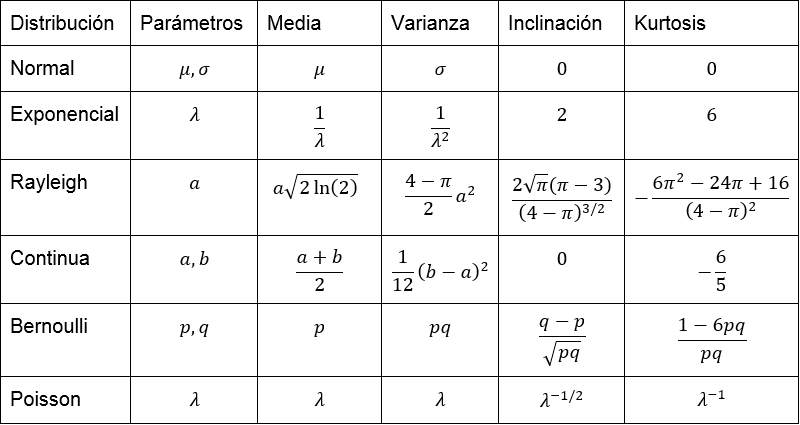

---
### Más información

* [Funciones estadísticas de `numpy`](https://numpy.org/doc/1.18/reference/routines.statistics.html)
* [Funciones estadísticas de `mstats`](https://docs.scipy.org/doc/scipy/reference/stats.mstats.html)
* [Documentación de `stats`](https://docs.scipy.org/doc/scipy/reference/stats.html)
* [Tutorial de `stats`](https://www.tutorialspoint.com/scipy/scipy_stats.htm)
---

---

**Universidad de Costa Rica**

Facultad de Ingeniería

Escuela de Ingeniería Eléctrica

---